In [ ]:
import zipfile
import os

# Here we have specified the path to the .zip file
zip_file_path = '/content/dataset.zip'
2
# Destination folder to unzip the .zip file
extract_to = '/content/'

# If the target folder does not exist, create it
os.makedirs(extract_to, exist_ok=True)

#Here we are extracting the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check the file structure
for root, dirs, files in os.walk(extract_to):
    for filename in files:
        print(os.path.join(root, filename))

/content/weather_forecastion_svm_model_with_pca.pkl
/content/tag_encoder.pkl
/content/dataset.zip
/content/pca_model.pkl
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/logs/2024.06.20/18.45.34.766844.log
/content/.config/logs/2024.06.20/18.44.51.925580.log
/content/.config/logs/2024.06.20/18.45.46.131261.log
/content/.config/logs/2024.06.20/18.45.16.088421.log
/content/.config/logs/2024.06.20/18.45.46.750529.log
/content/.config/logs/2024.06.20/18.45.26.499835.log
/content/.config/configurations/config_default
/content/dataset/test.csv
/content/dataset/shine/shine230.jpg
/content/dataset/shine/shine39.jpg
/content/dataset/shine/shine95.jpg
/content/dataset/shine/shine147.jpg
/content/dataset/shine/shine179.jpg
/content/dataset/shine/shine59.jpg
/content/dataset/shine/shine2

In [ ]:
pip install numpy scikit-learn opencv-python matplotlib

In [ ]:
# The necessary libaries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
# Set dataset path
dataset_path = '/content/dataset'
# Image parameters
img_width, img_height = 150, 150

In [ ]:
# Here we are  loading the  dataset
def import_dataset(dataset_path):
    pics = []
    tags = []
    for tag in os.listdir(dataset_path):
        tag_path = os.path.join(dataset_path, tag)
        if os.path.isdir(tag_path):
            for pic_file in os.listdir(tag_path):
                pic_path = os.path.join(tag_path, pic_file)
                pic = cv2.imread(pic_path)
                if pic is None:
                    continue  # Skip the pic if it cannot be loaded
                pic = cv2.resize(pic, (img_width, img_height))
                pics.append(pic)
                tags.append(tag)

    print(" The all of the  pics have been uploaded successfully.")
    return np.array(pics), np.array(tags)

pics, tags = import_dataset(dataset_path)

# Check if dataset is loaded correctly
if len(pics) == 0:
    raise ValueError("No pics loaded. Please check the dataset path and ensure it contains pics.")

 The all of the  pics have been uploaded successfully.


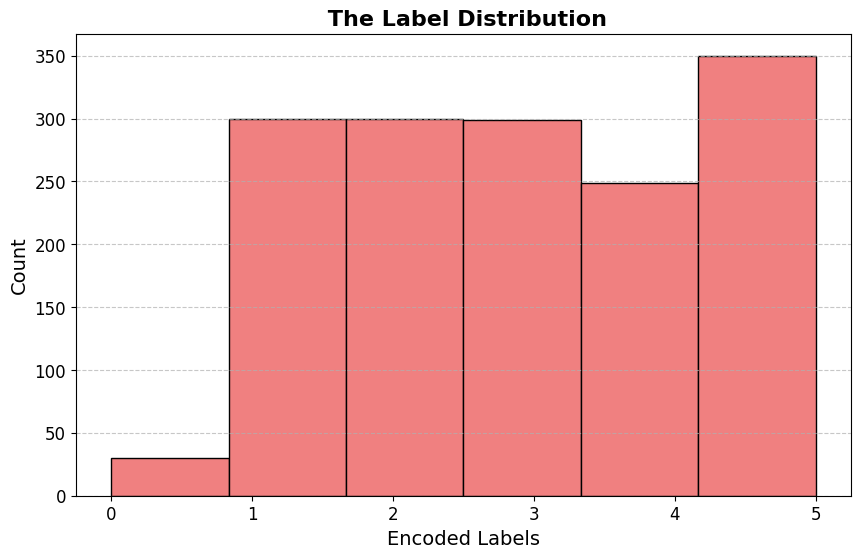

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Preparing the data

pics = pics.astype('float32') / 255.0  # Normalize pixel values
pics_flat = pics.reshape(len(pics), -1)  # Flatten images

# Encode labels
label_encoder = LabelEncoder()
tags_encoded = label_encoder.fit_transform(tags)

# Visualize label distribution
plt.figure(figsize=(10, 6))
plt.hist(tags_encoded, bins=len(set(tags_encoded)), edgecolor='black', color='lightcoral')
plt.title(' The Label Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Encoded Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(set(tags_encoded))), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Here we are spliting the datas into two parts training and test sets

X_train, X_test, y_train, y_test = train_test_split(pics_flat, tags_encoded, test_size=0.2, random_state=42)

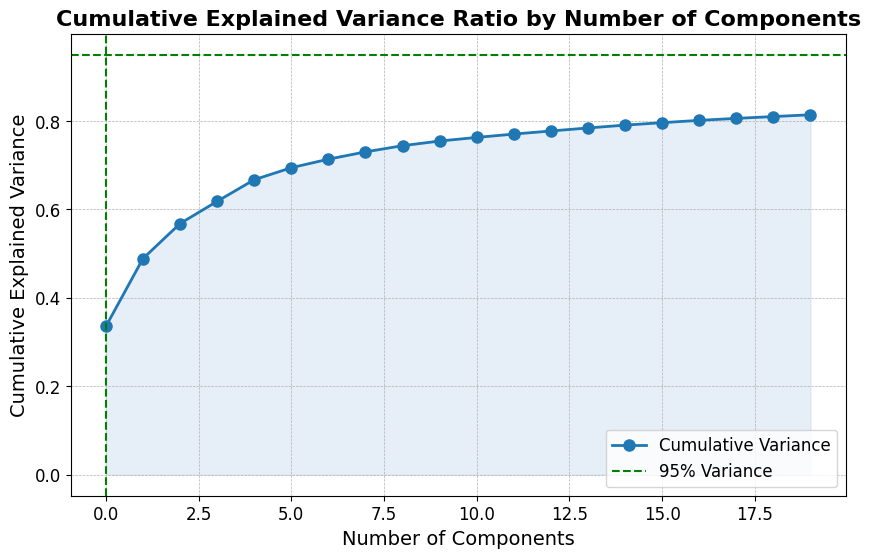

In [ ]:
from sklearn.decomposition import PCA
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Here we are using PCA to reduce data dimensions

n_components = 20  # desired number of principal components

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
joblib.dump(pca, 'pca_model.pkl')

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8, label='Cumulative Variance')
plt.fill_between(range(len(cumulative_variance)), cumulative_variance, color='#aec7e8', alpha=0.3)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance Ratio by Number of Components', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0.95, color='green', linestyle='--', linewidth=1.5, label='95% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='green', linestyle='--', linewidth=1.5)
plt.legend(loc='best', fontsize=12)
plt.show()


In [ ]:
# Training an SVM model with dimensionally reduced data

svm_model_pca = SVC(kernel='linear', probability=True)
svm_model_pca.fit(X_train_pca, y_train)

# Save the trained model and tag encoder

joblib.dump(svm_model_pca, 'weather_forecastion_svm_model_with_pca.pkl')
joblib.dump(label_encoder, 'tag_encoder.pkl')

print("Model training completed with PrincipalComponentAnalysis and saved as 'weather_forecastion_svm_model_with_pca.pkl'")

Model training completed with PrincipalComponentAnalysis and saved as 'weather_forecastion_svm_model_with_pca.pkl'


In [ ]:
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
import random
import os
import cv2
import matplotlib.pyplot as plt
import joblib

# Define the path to the dataset
test_dir = '/content/dataset/alien_test/'

# Load the model, label encoder, and PCA model
model = joblib.load('weather_forecastion_svm_model_with_pca.pkl')
label_encoder = joblib.load('tag_encoder.pkl')
pca = joblib.load('pca_model.pkl')

# Define the image display function
def display_predicted_image(image, predicted_class):
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Define the prediction function
def predict_weather(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    resized_image = cv2.resize(image, (img_width, img_height))
    image_array = resized_image.astype('float32') / 255.0

    image_flat = image_array.reshape(1, -1)
    image_pca = pca.transform(image_flat)

    prediction = model.predict(image_pca)
    predicted_class = label_encoder.inverse_transform(prediction)[0]
    return predicted_class, image

# Create a button widget
button = widgets.Button(description="Show Random Image", style={'button_color': 'forestgreen', 'font_weight': 'bold', 'font-size': '20px', 'width': '400px', 'height': '70px'})
output = widgets.Output()

# Set background image
background_image_style = """
    <style>
        body {
            background-image: url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBg3dONzLEZuWLSyBCiccqEeeQXqkyfVAV6A&s");
            background-size: cover;
        }
    </style>
"""
display(HTML(background_image_style))

display(button, output)

# Define the button click event
def on_button_clicked(b):
    random_image = random.choice(os.listdir(test_dir))
    image_path = os.path.join(test_dir, random_image)
    try:
        prediction, image = predict_weather(image_path)
        with output:
            print(f'The predicted weather condition is: {prediction}')
            print(f'Selected image: {random_image}')
            display_predicted_image(image, prediction)
    except ValueError as e:
        print(e)

# Attach the button click event to the button
button.on_click(on_button_clicked)


Button(description='Show Random Image', style=ButtonStyle(button_color='forestgreen', font_weight='bold'))

Output()

In [ ]:
# Predictions on training data
train_predictions = svm_model_pca.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on test data
test_predictions = svm_model_pca.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"The Train Accuracy is: {train_accuracy * 100:.2f}%")
print(f"The Test Accuracy is: {test_accuracy * 100:.2f}%")

The Train Accuracy is: 73.49%
The Test Accuracy is: 69.93%


In [ ]:
# Load trained model and label encoder
svm_model_pca = joblib.load('weather_forecastion_svm_model_with_pca.pkl')
label_encoder = joblib.load('tag_encoder.pkl')
# Predictions using SVM model with PCA
svm_predictions_pca = svm_model_pca.predict(X_test_pca)
# Generate classification report
report = classification_report(y_test, svm_predictions_pca)
# Print classification report
print("Report of the Classification:")
print(report)

Report of the Classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.51      0.48      0.50        56
           2       0.58      0.66      0.62        56
           3       0.65      0.68      0.66        62
           4       0.82      0.84      0.83        44
           5       0.91      0.86      0.88        83

    accuracy                           0.70       306
   macro avg       0.58      0.59      0.58       306
weighted avg       0.70      0.70      0.70       306

